# Data Prep

## Importing packages:

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

## Reading comma separated files into dataframes.
## Change the path below to point to churn and margin data:

In [3]:
churn_df = pd.read_csv('C:\\Users\priya\churn_data.csv')
margin_df = pd.read_csv('C:\\Users\priya\margin_data.csv')

## Use the head method to view churn dataframe:

In [4]:
churn_df.head()

,ST,Zip,DMA,Area_Cd,emailable,solicit_ph_ind,solicit_email_ind,fixd_incm_flg,scheduled_purchase_flg,months_since_last_trans,...,resp_cnt_36mo,call_in_mo_36mo,call_out_mo_36mo,order_cnt_36mo,tier,tier_prev,acct_ID,activation_date,event_date,churn_year_plus1_ind
0,VA,23464,544,missing,0,0,1,0,0,2,...,0,0,0,1,3-Gold,xxx,B102465045,04JAN04,30JUN15,1
1,NC,27542,560,919,1,1,1,0,0,4,...,0,4,0,8,5-Diamond,3-Gold,B106897643,04JUL04,NaN,0
2,NV,89109,839,702,0,0,1,0,0,8,...,0,0,0,1,1-Bronze,xxx,B111832829,03SEP06,NaN,0
3,OH,43050,535,614,0,1,1,0,0,1,...,0,0,0,6,1-Bronze,xxx,B112883062,03SEP05,NaN,0
4,HI,96789,744,808,1,1,1,0,0,4,...,6,4,0,6,4-Platinum,3-Gold,B113581008,03DEC05,NaN,0


## Use pandas describe method to see variable stats,
##    and transpose to show variables as a list:

In [5]:
print(" summary stats on churn data ") 
print(churn_df.describe(include='all').transpose())

 summary stats on churn data 
                          count unique         top   freq       mean  \
ST                        73481     59          CA   6649        NaN   
Zip                       73481  18361     missing    282        NaN   
DMA                       73481    216         803   3013        NaN   
Area_Cd                   73481    328     missing   3851        NaN   
emailable                 73481    NaN         NaN    NaN   0.517644   
solicit_ph_ind            73481    NaN         NaN    NaN   0.891509   
solicit_email_ind         73481    NaN         NaN    NaN   0.963719   
fixd_incm_flg             73481    NaN         NaN    NaN  0.0918741   
scheduled_purchase_flg    73481    NaN         NaN    NaN   0.264749   
months_since_last_trans   73481    NaN         NaN    NaN    2.90516   
months_since_first_trans  73481    NaN         NaN    NaN    65.2841   
purch_cnt_life            73481    NaN         NaN    NaN      55.77   
purch_amt_life            73481   

## Use head method to view margin dataframe:

In [6]:
margin_df.head()

,trans_amt_t_minus_00,trans_amt_t_minus_01,trans_amt_t_minus_02,trans_amt_t_minus_03,trans_amt_t_minus_04,trans_amt_t_minus_05,trans_amt_t_minus_06,trans_amt_t_minus_07,trans_amt_t_minus_08,trans_amt_t_minus_09,...,cost_amt_t_plus_04,cost_amt_t_plus_05,cost_amt_t_plus_06,cost_amt_t_plus_07,cost_amt_t_plus_08,cost_amt_t_plus_09,cost_amt_t_plus_10,cost_amt_t_plus_11,cost_amt_t_plus_12,acct_ID
0,0.0,1961.0,6110.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.30,0.00,0.00,0.00,0.30,0.00,0.00,B102465045
1,0.0,0.0,0.0,40.0,0.0,400.0,200.0,150.0,0.0,0.0,...,13.97,15.69,14.87,14.79,14.57,14.27,14.27,14.76,14.53,B106897643
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300.0,0.0,0.0,...,0.00,0.00,0.00,3.91,2.87,0.00,0.00,0.00,0.00,B111832829
3,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,1.29,0.26,0.00,0.00,0.00,0.00,0.30,0.00,0.30,B112883062
4,0.0,0.0,0.0,600.0,0.0,0.0,0.0,700.0,300.0,300.0,...,15.04,15.09,15.94,18.68,15.94,15.30,17.72,15.06,15.90,B113581008


## Modify margin data to only have ANNUAL margin numbers,
##    and print stats on the new margin dataframe:

In [7]:
margin_df['rev_Y_neg_1']=margin_df['trans_amt_t_minus_00']+margin_df['trans_amt_t_minus_01']+margin_df['trans_amt_t_minus_02']+margin_df['trans_amt_t_minus_03']+margin_df['trans_amt_t_minus_04']+margin_df['trans_amt_t_minus_05']+margin_df['trans_amt_t_minus_06']+margin_df['trans_amt_t_minus_07']+margin_df['trans_amt_t_minus_08']+margin_df['trans_amt_t_minus_09']+margin_df['trans_amt_t_minus_10']+margin_df['trans_amt_t_minus_11']
margin_df['cost_Y_neg_1']=margin_df['cost_amt_t_minus_00']+margin_df['cost_amt_t_minus_01']+margin_df['cost_amt_t_minus_02']+margin_df['cost_amt_t_minus_03']+margin_df['cost_amt_t_minus_04']+margin_df['cost_amt_t_minus_05']+margin_df['cost_amt_t_minus_06']+margin_df['cost_amt_t_minus_07']+margin_df['cost_amt_t_minus_08']+margin_df['cost_amt_t_minus_09']+margin_df['cost_amt_t_minus_10']+margin_df['cost_amt_t_minus_11']
margin_df['margin_Y_neg_1']=margin_df['rev_Y_neg_1']-margin_df['cost_Y_neg_1']

margin_df['rev_Y_neg_2']=margin_df['trans_amt_t_minus_12']+margin_df['trans_amt_t_minus_13']+margin_df['trans_amt_t_minus_14']+margin_df['trans_amt_t_minus_15']+margin_df['trans_amt_t_minus_16']+margin_df['trans_amt_t_minus_17']+margin_df['trans_amt_t_minus_18']+margin_df['trans_amt_t_minus_19']+margin_df['trans_amt_t_minus_20']+margin_df['trans_amt_t_minus_21']+margin_df['trans_amt_t_minus_22']+margin_df['trans_amt_t_minus_23']
margin_df['cost_Y_neg_2']=margin_df['cost_amt_t_minus_12']+margin_df['cost_amt_t_minus_13']+margin_df['cost_amt_t_minus_14']+margin_df['cost_amt_t_minus_15']+margin_df['cost_amt_t_minus_16']+margin_df['cost_amt_t_minus_17']+margin_df['cost_amt_t_minus_18']+margin_df['cost_amt_t_minus_19']+margin_df['cost_amt_t_minus_20']+margin_df['cost_amt_t_minus_21']+margin_df['cost_amt_t_minus_22']+margin_df['cost_amt_t_minus_23']
margin_df['margin_Y_neg_2']=margin_df['rev_Y_neg_2']-margin_df['cost_Y_neg_2']

margin_df['rev_Y_neg_3']=margin_df['trans_amt_t_minus_24']+margin_df['trans_amt_t_minus_25']+margin_df['trans_amt_t_minus_26']+margin_df['trans_amt_t_minus_27']+margin_df['trans_amt_t_minus_28']+margin_df['trans_amt_t_minus_29']+margin_df['trans_amt_t_minus_30']+margin_df['trans_amt_t_minus_31']+margin_df['trans_amt_t_minus_32']+margin_df['trans_amt_t_minus_33']+margin_df['trans_amt_t_minus_34']+margin_df['trans_amt_t_minus_35']
margin_df['cost_Y_neg_3']=margin_df['cost_amt_t_minus_24']+margin_df['cost_amt_t_minus_25']+margin_df['cost_amt_t_minus_26']+margin_df['cost_amt_t_minus_27']+margin_df['cost_amt_t_minus_28']+margin_df['cost_amt_t_minus_29']+margin_df['cost_amt_t_minus_30']+margin_df['cost_amt_t_minus_31']+margin_df['cost_amt_t_minus_32']+margin_df['cost_amt_t_minus_33']+margin_df['cost_amt_t_minus_34']+margin_df['cost_amt_t_minus_35']
margin_df['margin_Y_neg_3']=margin_df['rev_Y_neg_3']-margin_df['cost_Y_neg_3']

margin_df['rev_Y_pos_1']=margin_df['trans_amt_t_plus_01']+margin_df['trans_amt_t_plus_02']+margin_df['trans_amt_t_plus_03']+margin_df['trans_amt_t_plus_04']+margin_df['trans_amt_t_plus_05']+margin_df['trans_amt_t_plus_06']+margin_df['trans_amt_t_plus_07']+margin_df['trans_amt_t_plus_08']+margin_df['trans_amt_t_plus_09']+margin_df['trans_amt_t_plus_10']+margin_df['trans_amt_t_plus_11']+margin_df['trans_amt_t_plus_12']
margin_df['cost_Y_pos_1']=margin_df['cost_amt_t_plus_01']+margin_df['cost_amt_t_plus_02']+margin_df['cost_amt_t_plus_03']+margin_df['cost_amt_t_plus_04']+margin_df['cost_amt_t_plus_05']+margin_df['cost_amt_t_plus_06']+margin_df['cost_amt_t_plus_07']+margin_df['cost_amt_t_plus_08']+margin_df['cost_amt_t_plus_09']+margin_df['cost_amt_t_plus_10']+margin_df['cost_amt_t_plus_11']+margin_df['cost_amt_t_plus_12']
margin_df['margin_Y_pos_1']=margin_df['rev_Y_pos_1']-margin_df['cost_Y_pos_1']

margin_df = margin_df[['acct_ID','margin_Y_neg_1','margin_Y_neg_2','margin_Y_neg_3','margin_Y_pos_1']]

print(" summary stats on margin data ") 
print(margin_df.describe(include='all').transpose())

 summary stats on margin data 
                count unique         top freq     mean      std      min  \
acct_ID         73481  73384  I152642467    3      NaN      NaN      NaN   
margin_Y_neg_1  73481    NaN         NaN  NaN  229.165  1590.26 -18624.2   
margin_Y_neg_2  73481    NaN         NaN  NaN  194.084  1696.54 -7675.16   
margin_Y_neg_3  73481    NaN         NaN  NaN  158.677  1392.78 -6902.63   
margin_Y_pos_1  73481    NaN         NaN  NaN  357.207  1720.88  -2679.1   

                  25%     50%     75%     max  
acct_ID           NaN     NaN     NaN     NaN  
margin_Y_neg_1  43.12  182.31  338.27  197544  
margin_Y_neg_2      0  122.92  294.78  203657  
margin_Y_neg_3      0   26.17  243.63  194459  
margin_Y_pos_1  -2.21  162.27  332.86  199705  


## Create bar chart to explore churn rates by tiers:

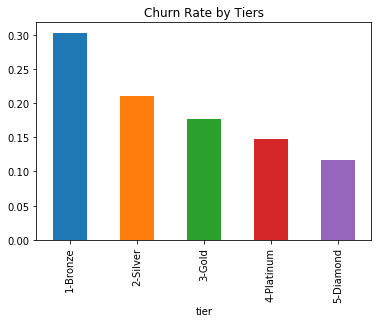

In [8]:
temp_df = churn_df.groupby(['tier'])['churn_year_plus1_ind'].mean()
temp_df.plot.bar(title="Churn Rate by Tiers")

## Create histogram to explore distribution of variables in churn data:

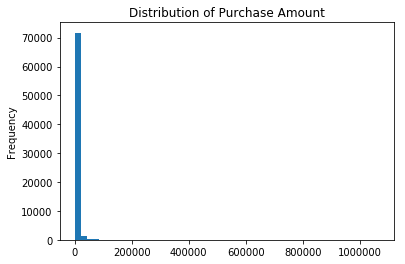

In [9]:
churn_df['purch_amt_life'].plot.hist(title="Distribution of Purchase Amount",bins=50)

## Create histogram to explore distribution of variables in margin data:

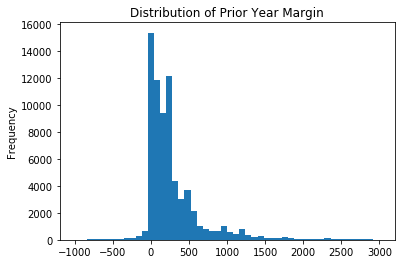

In [10]:
temp_df = margin_df.query('-1000<margin_Y_neg_1<3000')
temp_df['margin_Y_neg_1'].plot.hist(title="Distribution of Prior Year Margin",bins=50)

## Feature engineering on the Churn data:

In [11]:
""" when avg interval = -1 replace with 36 months """
churn_df['purch_avg_interval'].replace([-1], 36, inplace=True)

""" when avg purchase = -1 replace with 0 """
churn_df['purch_avg_36mo'].replace([-1], 0, inplace=True)

churn_df['log_order_cnt_36mo']=np.log10(churn_df['order_cnt_36mo']+1)
churn_df['log_purch_amt_36mo']=np.log10(churn_df['purch_amt_36mo']+1)
churn_df['log_purch_amt_life']=np.log10(churn_df['purch_amt_life']+1)
churn_df['log_purch_avg_36mo']=np.log10(churn_df['purch_avg_36mo']+1)
churn_df['log_purch_cnt_life']=np.log10(churn_df['purch_cnt_life']+1)
churn_df['log_purch_cnt_tt_36mo']=np.log10(churn_df['purch_cnt_tt_36mo']+1)
churn_df['log_resp_cnt_36mo']=np.log10(churn_df['resp_cnt_36mo']+1)

churn_df['perc_purch_cc_36mo']=np.where(churn_df['purch_cnt_tt_36mo']==0,0,churn_df['purch_cnt_cc_36mo']/churn_df['purch_cnt_tt_36mo'])
churn_df['perc_purch_ck_36mo']=np.where(churn_df['purch_cnt_tt_36mo']==0,0,churn_df['purch_cnt_ck_36mo']/churn_df['purch_cnt_tt_36mo'])
churn_df['perc_purch_et_36mo']=np.where(churn_df['purch_cnt_tt_36mo']==0,0,churn_df['purch_cnt_et_36mo']/churn_df['purch_cnt_tt_36mo'])

churn_df = churn_df.drop(['order_cnt_36mo','purch_amt_36mo','purch_amt_life','purch_avg_36mo','purch_cnt_life',
                          'purch_cnt_tt_36mo','resp_cnt_36mo',
                          'purch_cnt_cc_36mo','purch_cnt_ck_36mo','purch_cnt_et_36mo'],axis=1)

print(" summary stats on churn data ") 
print(churn_df.describe(include='all').transpose())

 summary stats on churn data 
                          count unique         top   freq       mean  \
ST                        73481     59          CA   6649        NaN   
Zip                       73481  18361     missing    282        NaN   
DMA                       73481    216         803   3013        NaN   
Area_Cd                   73481    328     missing   3851        NaN   
emailable                 73481    NaN         NaN    NaN   0.517644   
solicit_ph_ind            73481    NaN         NaN    NaN   0.891509   
solicit_email_ind         73481    NaN         NaN    NaN   0.963719   
fixd_incm_flg             73481    NaN         NaN    NaN  0.0918741   
scheduled_purchase_flg    73481    NaN         NaN    NaN   0.264749   
months_since_last_trans   73481    NaN         NaN    NaN    2.90516   
months_since_first_trans  73481    NaN         NaN    NaN    65.2841   
purch_avg_interval        73481    NaN         NaN    NaN    4.85447   
mail_cnt_36mo             73481   

## histogram plot on new log variable in Churn data

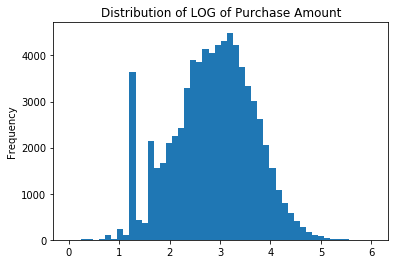

In [11]:
churn_df['log_purch_amt_life'].plot.hist(title="Distribution of LOG of Purchase Amount",bins=50)

## Feature engineering on margin data, while keeping original variables.
## Using logs with an offset that will account for very large negative margins:

In [12]:
margin_df['margin_3yr_avg']=(margin_df['margin_Y_neg_1']+margin_df['margin_Y_neg_2']+margin_df['margin_Y_neg_3'])/3
margin_df['log_margin_Y_neg_1']=np.log10(margin_df['margin_Y_neg_1']+50000)
margin_df['log_margin_Y_neg_2']=np.log10(margin_df['margin_Y_neg_2']+50000)
margin_df['log_margin_Y_neg_3']=np.log10(margin_df['margin_Y_neg_3']+50000)
margin_df['log_margin_3yr_avg']=np.log10(margin_df['margin_3yr_avg']+50000)
margin_df['log_margin_Y_pos_1']=np.log10(margin_df['margin_Y_pos_1']+50000)

## Histogram on transformed target for Margin data

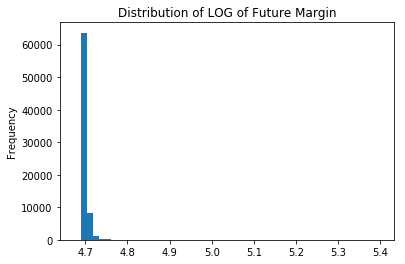

In [13]:
margin_df['log_margin_Y_pos_1'].plot.hist(title="Distribution of LOG of Future Margin",bins=50)

## Scatter plot on Future Margin vs Prior Margin (logarithms):

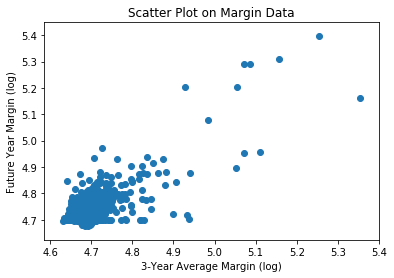

In [14]:
plt.scatter(margin_df['log_margin_3yr_avg'], margin_df['log_margin_Y_pos_1'])
plt.xlabel("3-Year Average Margin (log)")
plt.ylabel("Future Year Margin (log)")
plt.title("Scatter Plot on Margin Data")
print(" ") 
plt.show()

## Eliminating duplicate acct_IDs before joining data:

In [15]:
churn_df.drop_duplicates(subset=['acct_ID'], keep='first', inplace=True)
churn_df.shape

(73384, 31)

In [16]:
margin_df.drop_duplicates(subset=['acct_ID'], keep='first', inplace=True)
margin_df.shape

(73384, 11)

## Join Churn and Margin data by acct_ID:

In [17]:
combined_df = pd.merge(churn_df, margin_df, on='acct_ID', how='inner')
combined_df.shape

(73384, 41)

## Create dummy variables for certain categorical variables.

In [18]:
""" WARNING: this commented-out approach would create dummy indicators for all """
"""    categorical variables, including those with very high cardinality, such as zip codes """
"""    and also would drop the original categorical variables and only keep the dummy indicators """

""" combined_df = pd.get_dummies(combined_df) """

""" this approach hand-picks only certain variables for which to create dummy indicators """
""" and keeps the original variables too """

for column in ['ST', 'tier', 'tier_prev']:
    dummies = pd.get_dummies(combined_df[column],prefix=column)
    combined_df[dummies.columns] = dummies

print(" ") 
print("New dataset with dummies") 
print(" ") 
print(combined_df.head(10)) 
print(" ") 
print("Columns in new data")
print(" ") 
print(combined_df.dtypes)

 
New dataset with dummies
 
   ST    Zip  DMA  Area_Cd  emailable  solicit_ph_ind  solicit_email_ind  \
0  VA  23464  544  missing          0               0                  1   
1  NC  27542  560      919          1               1                  1   
2  NV  89109  839      702          0               0                  1   
3  OH  43050  535      614          0               1                  1   
4  HI  96789  744      808          1               1                  1   
5  NC  28278  517      704          0               1                  1   
6  WV  24966  559  missing          1               0                  1   
7  NC  27317  518      336          0               1                  1   
8  MT  59870  762      406          0               1                  1   
9  KY  40272  529      502          1               1                  1   

   fixd_incm_flg  scheduled_purchase_flg  months_since_last_trans  \
0              0                       0                        2

## export updated data as new csv file

In [19]:
combined_df.to_csv('C:\\Users\priya\combined_data.csv',index=False)